In [0]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.style.use('ggplot')

In [0]:
filestatewise = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/statewise.csv'
filecrosscountry = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/cross_country.csv'
fileeducation = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/education.csv'
fileemployment = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/employment.csv'
filebusiness = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/business.csv'

#population
filepopulation2011 = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/population2011.csv'
filecensus2011 = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/CSV/graphs_csv/census2011summary.csv'

#raw files
filestateraw2011 = '/content/drive/My Drive/College/Semester2/MLN/Project Excels/Scrath/2011/Inter state Migration statistics with headings.xlsx'

In [0]:
dfstatewise    = pd.read_csv(filestatewise)
dfcrosscountry = pd.read_csv(filecrosscountry)
dfeducation    = pd.read_csv(fileeducation)
dfemployment   = pd.read_csv(fileemployment)
dfbusiness     = pd.read_csv(filebusiness)

#population
dfpop2011 = pd.read_csv(filepopulation2011, header=None, names=['Pop Size'])
dfcensus2011 = pd.read_csv(filecensus2011)
dfstateraw2011 = pd.read_excel(filestateraw2011, sheet_name='Total')

In [0]:
dfstateraw2011['Area Name']   = dfstateraw2011['Area Name'].str.replace('State -', '')
dfstateraw2011['Area Name']   = dfstateraw2011['Area Name'].str.replace('Union Territory -', '')
dfstateraw2011['Area Name']   = dfstateraw2011['Area Name'].str.lower()
dfstateraw2011['Area Name']   = dfstateraw2011['Area Name'].str.strip()
dfstateraw2011['Last residence'] = dfstateraw2011['Last residence'].str.lower()
dfstateraw2011['Last residence'] = dfstateraw2011['Last residence'].str.strip()
i = dfstateraw2011[(dfstateraw2011['Last residence'] == 'last residence outside india')].index
dfstateraw2011 = dfstateraw2011.drop(i)
i= dfstateraw2011[(dfstateraw2011['Last residence'] == 'other countries')].index
dfstateraw2011 = dfstateraw2011.drop(i)
i =dfstateraw2011[(dfstateraw2011['Last residence'] == 'unclassifiable')].index
dfstateraw2011 = dfstateraw2011.drop(i)

In [5]:
dfstatewise = dfstatewise.sort_values(by=['Id'])
dfstatewise = dfstatewise.reset_index(drop=True)
dfstatewise.head()

,Id,Label,timeset,modularity_class,Authority,Hub,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighted indegree,weighted outdegree,Weighted Degree,indegree,outdegree,Degree,pageranks,clustering,eigencentrality
0,andaman & nicobar islands,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,81267,20700,101967,34,34,68,0.028992,0.983066,1.00000
1,andhra pradesh,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,1591890,2030004,3621894,34,34,68,0.028992,0.983066,1.00000
2,arunachal pradesh,NaN,NaN,1,0.167185,0.171600,1,1.0,1.0,0.422139,136010,37368,173378,33,34,67,0.028180,0.983957,0.97261
3,assam,NaN,NaN,1,0.171440,0.171473,1,1.0,1.0,0.641716,495699,659694,1155393,34,34,68,0.028992,0.983066,1.00000
4,bihar,NaN,NaN,0,0.171440,0.171473,1,1.0,1.0,0.641716,1111954,7453803,8565757,34,34,68,0.028992,0.983066,1.00000


In [0]:
tdfstatewise =  dfstatewise[['Id', 'weighted indegree', 'weighted outdegree']]
dfstatewise['Pop Size'] = dfcensus2011['Population']
dfstatewise['Pop Size'] = dfstatewise['Pop Size'].str.replace(',','')
dfstatewise['Pop Size'] = dfstatewise['Pop Size'].astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


[]

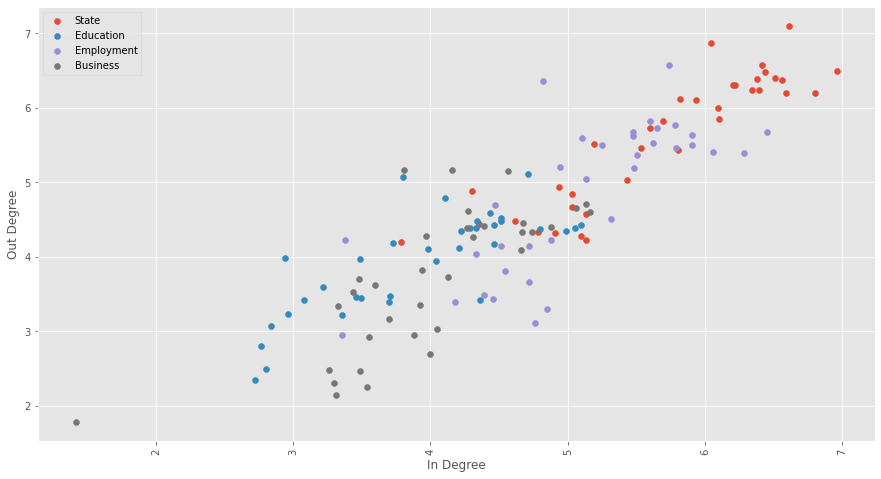

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(np.log10(dfstatewise['weighted indegree']),np.log10( dfstatewise['weighted outdegree']))
plt.scatter(np.log10(dfeducation['weighted indegree']), np.log10(dfeducation['weighted outdegree']))
plt.scatter(np.log10(dfemployment['weighted indegree']), np.log10(dfemployment['weighted outdegree']))
plt.scatter(np.log10(dfbusiness['weighted indegree']), np.log10(dfbusiness['weighted outdegree']))
plt.legend(['State', 'Education', 'Employment', 'Business'])
plt.xticks(rotation=90)
plt.xlabel('In Degree')
plt.ylabel('Out Degree')
plt.plot()

[]

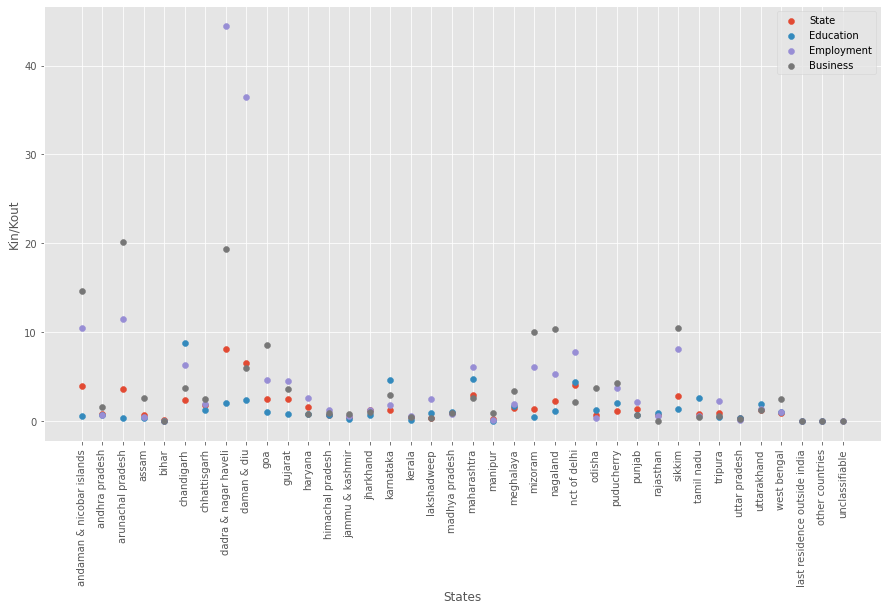

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(dfstatewise['Id'], dfstatewise['weighted indegree']/dfstatewise['weighted outdegree'])
plt.scatter(dfeducation['Id'], dfeducation['weighted indegree']/dfeducation['weighted outdegree'])
plt.scatter(dfemployment['Id'], dfemployment['weighted indegree']/dfemployment['weighted outdegree'])
plt.scatter(dfbusiness['Id'], dfbusiness['weighted indegree']/dfbusiness['weighted outdegree'])
plt.legend(['State', 'Education', 'Employment', 'Business'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Kin/Kout')
plt.plot()

In [0]:
dfcensus2011['Population']= dfcensus2011['Population'].str.replace(',','')
dfcensus2011['Population'] = dfcensus2011['Population'].astype(int)

In [10]:
dfcensus2011.head()

,State,Capitals,Type,Population,perctotalpopulation,Males,Females,SexRatio,Literacyrate,Rural Population,Urban Population,Area,Density,DecadalGrowth,Language
0,Andaman and Nicobar Islands,Port Blair,UT,380581,0.03,"202,871","177,710",876,86.63,"244,411","135,533","8,249",46,6.7%,Other
1,Andhra Pradesh,Hyderabad,State,84580777,6.99,"42,442,146","42,138,631",993,67.02,"56,361,702","28,219,075","275,045",308,10.98%,Other
2,Arunachal Pradesh,Itanagar,State,1383727,0.11,"713,912","669,815",938,65.38,"1,069,165","313,446","83,743",17,25.9%,Other
3,Assam,Dispur,State,31205576,2.58,"15,939,443","15,266,133",958,72.19,"26,780,526","4,388,756","78,438",397,16.9%,Assames
4,Bihar,Patna,State,104099452,8.60,"54,278,157","49,821,295",918,61.80,"92,075,028","11,729,609","94,163","1,102",25.1%,Bhojpuri


In [0]:
literacy2011 = np.argsort(dfcensus2011['Density'])[:20]

[]

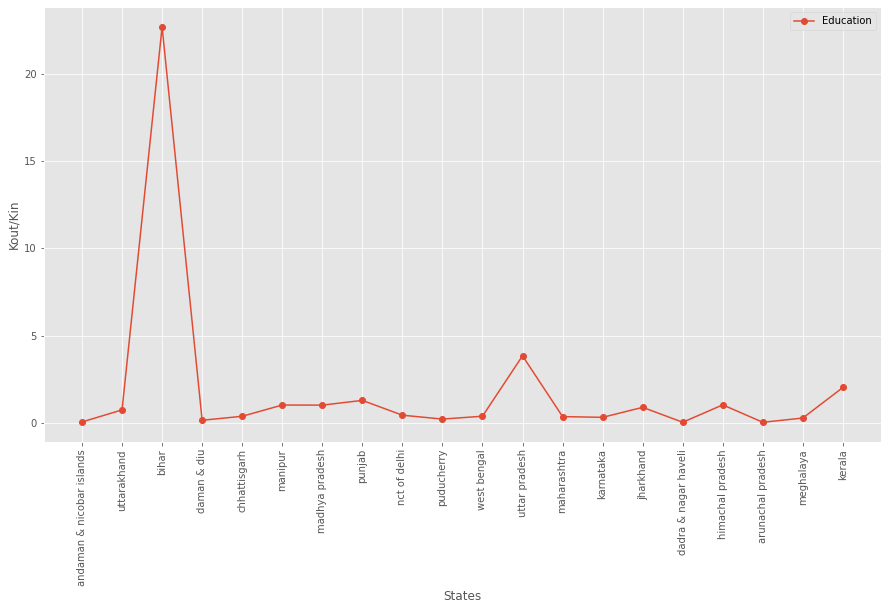

In [12]:
plt.figure(figsize=(15,8))

# plt.plot(dfeducation['Id'].iloc[literacy2011], dfeducation['weighted outdegree'].iloc[literacy2011]/dfeducation['weighted indegree'].iloc[literacy2011], marker='o')
# plt.plot(dfemployment['Id'].iloc[literacy2011], dfemployment['weighted outdegree'].iloc[literacy2011]/dfemployment['weighted indegree'].iloc[literacy2011], marker='o')
plt.plot(dfbusiness['Id'].iloc[literacy2011], dfbusiness['weighted outdegree'].iloc[literacy2011]/dfbusiness['weighted indegree'].iloc[literacy2011], marker='o')
plt.legend(['Education', 'Employment', 'Business'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Kout/Kin')
plt.plot()

In [0]:
# plt.figure(figsize=(15,8))
# plt.scatter( np.log10(dfstatewise['weighted indegree']/ dfstatewise['weighted outdegree']), np.log10(dfstatewise['Pop Size']) )
# plt.xticks(rotation=90)

In [14]:
dfcensus2011['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [15]:
dfstateraw2011.head()

,Area Name,Last residence,Total migrants Persons,Total migrants Males,Total migrantsFemales,Work/employment Persons,Work/employment Males,Work/employment Females,Business Persons,Business Males,Business Females,Education Persons,Education Males,Education Females,Marriage Persons,Marriage Males,Marriage Females,Moved after birth Persons,Moved after birth Males,Moved after birth Females,Moved with householdPersons,Moved with household Males,Moved with household Females,Others Persons,Others Males,Others Females,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 16338,Unnamed: 16339,Unnamed: 16340,Unnamed: 16341,Unnamed: 16342,Unnamed: 16343,Unnamed: 16344,Unnamed: 16345,Unnamed: 16346,Unnamed: 16347,Unnamed: 16348,Unnamed: 16349,Unnamed: 16350,Unnamed: 16351,Unnamed: 16352,Unnamed: 16353,Unnamed: 16354,Unnamed: 16355,Unnamed: 16356,Unnamed: 16357,Unnamed: 16358,Unnamed: 16359,Unnamed: 16360,Unnamed: 16361,Unnamed: 16362,Unnamed: 16363,Unnamed: 16364,Unnamed: 16365,Unnamed: 16366,Unnamed: 16367,Unnamed: 16368,Unnamed: 16369,Unnamed: 16370,Unnamed: 16371,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377
0,jammu & kashmir,jammu & kashmir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jammu & kashmir,himachal pradesh,8609,2688,5921,726,643,83,109,74,35,165,95,70,4266,137,4129,72,49,23,1470,601,869,1801,1089,712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,jammu & kashmir,punjab,43938,12318,31620,3804,3237,567,816,708,108,440,219,221,23773,548,23225,618,387,231,7212,3162,4050,7275,4057,3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,jammu & kashmir,chandigarh,611,249,362,88,73,15,7,7,0,17,10,7,153,6,147,26,13,13,183,71,112,137,69,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jammu & kashmir,uttarakhand,3180,1633,1547,447,390,57,37,29,8,60,36,24,361,57,304,42,26,16,1180,393,787,1053,702,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# dfstateraw2011.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/TotalInterState.csv', index=False)

In [0]:
top5 = dfstateraw2011.groupby('Area Name')['Total migrants Persons'].apply(lambda grp: grp.nlargest(5)).index

In [0]:
top5 = dfstateraw2011.groupby('Area Name')['Total migrants Persons'].apply(lambda grp: grp.nlargest(10)).index
top5data = []
for i in top5:
  top5data.append([dfstateraw2011['Last residence'].loc[i[1]], i[0], dfstateraw2011['Total migrants Persons'].loc[i[1]]])
temporarydf = pd.DataFrame(top5data, columns=['Source', 'Target','Weight'])
temporarydf.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/FinalData/Top10InterState.csv', index=False)


In [19]:
temporarydf.head()

,Source,Target,Weight
0,west bengal,andaman & nicobar islands,20998
1,tamil nadu,andaman & nicobar islands,18136
2,andhra pradesh,andaman & nicobar islands,15681
3,jharkhand,andaman & nicobar islands,7612
4,kerala,andaman & nicobar islands,4829


In [20]:
dfcrosscountry.head()

,Id,Label,timeset,modularity_class,pageranks,Authority,Hub,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighted indegree,weighted outdegree,Weighted Degree,indegree,outdegree,Degree,componentnumber,strongcompnum,clustering
0,afganistan,NaN,NaN,0,0.010213,0.000000,0.167610,1,1,1,0,0,6596,6596,0,24,24,0,24,0
1,jammu & kashmir,NaN,NaN,0,0.019290,0.174592,0.000000,0,0,0,0,19478,0,19478,27,0,27,0,23,0
2,bangladesh,NaN,NaN,3,0.010213,0.000000,0.203748,1,1,1,0,0,2304305,2304305,0,34,34,0,35,0
3,bhutan,NaN,NaN,0,0.010213,0.000000,0.201129,1,1,1,0,0,9007,9007,0,33,33,0,36,0
4,china,NaN,NaN,0,0.010213,0.000000,0.191068,1,1,1,0,0,13537,13537,0,30,30,0,37,0


[]

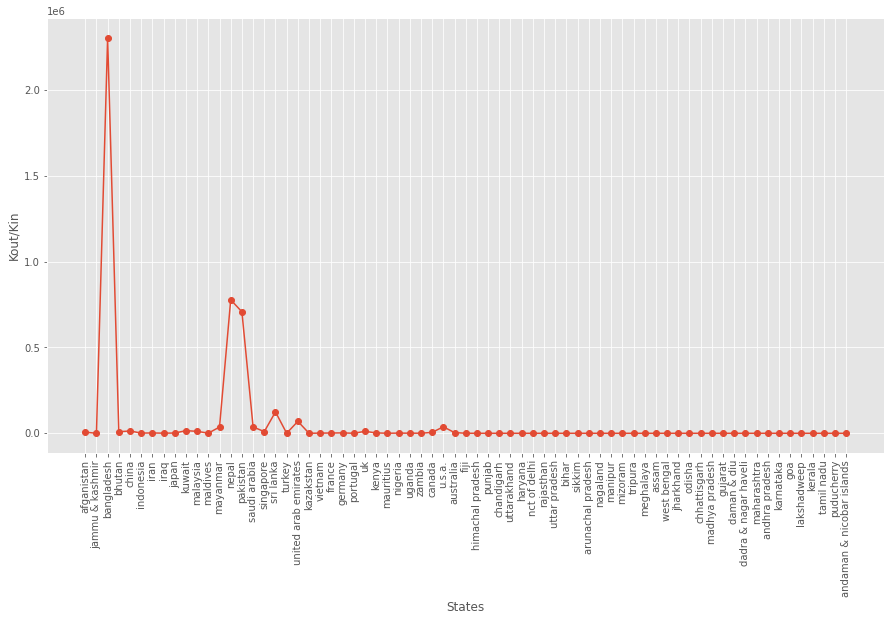

In [21]:
plt.figure(figsize=(15,8))
plt.plot(dfcrosscountry['Id'], dfcrosscountry['weighted outdegree'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Kout/Kin')
plt.plot()

In [0]:
# temporarydf = pd.DataFrame(top5data, columns=['Source', 'Target','Weight'])
# temporarydf.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/Top5InterState.csv', index=False)
# dfstateraw2011.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/FinalData/GraphEdges.csv', index=False, header=['Target', 'Source','Weight'])

In [0]:
# for i in range(dfstateraw2011.shape[0]):
  # dfstateraw2011['Area Name'].loc[i]

In [0]:
# top5 = dfstateraw2011.groupby('Area Name')['Total migrants Persons'].apply(lambda grp: grp.nlargest(5)).index
# top5data = []
# for i in range(dfstateraw2011.index):
#   top5data.append([dfstateraw2011['Last residence'].loc[i[1]], dfstateraw2011['Area Name'].loc[i[0]], dfstateraw2011['Total migrants Persons'].loc[i[1]]])

In [0]:
# plt.scatter(dfcensus2011['Population'], )

In [0]:
dfstateraw2011.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/FinalData/2011raw.csv', index=False)

State wise degree distribution

In [27]:
dfstatewise.head()

,Id,Label,timeset,modularity_class,Authority,Hub,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighted indegree,weighted outdegree,Weighted Degree,indegree,outdegree,Degree,pageranks,clustering,eigencentrality,Pop Size
0,andaman & nicobar islands,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,81267,20700,101967,34,34,68,0.028992,0.983066,1.00000,380581.0
1,andhra pradesh,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,1591890,2030004,3621894,34,34,68,0.028992,0.983066,1.00000,84580777.0
2,arunachal pradesh,NaN,NaN,1,0.167185,0.171600,1,1.0,1.0,0.422139,136010,37368,173378,33,34,67,0.028180,0.983957,0.97261,1383727.0
3,assam,NaN,NaN,1,0.171440,0.171473,1,1.0,1.0,0.641716,495699,659694,1155393,34,34,68,0.028992,0.983066,1.00000,31205576.0
4,bihar,NaN,NaN,0,0.171440,0.171473,1,1.0,1.0,0.641716,1111954,7453803,8565757,34,34,68,0.028992,0.983066,1.00000,104099452.0


In [0]:
degreedatastateraw2011         =  list(dfstatewise['indegree'])
uniquedfdegreedatastateraw2011 =  dfstatewise['indegree'].unique()
indegreedist2011 = Counter(degreedatastateraw2011)
degreedatastateraw2011         =  list(dfstatewise['outdegree'])
uniquedfdegreedatastateraw2011 =  dfstatewise['outdegree'].unique()
outdegreedist2011 = Counter(degreedatastateraw2011)

In [29]:
indegreedist2011 = {k: v for k, v in sorted(indegreedist2011.items(), key=lambda item: item[1], reverse=True)}
outdegreedist2011 = {k: v for k, v in sorted(outdegreedist2011.items(), key=lambda item: item[1], reverse=True)}
indegreedist2011.keys()

dict_keys([34, 32, 33, 30])

[]

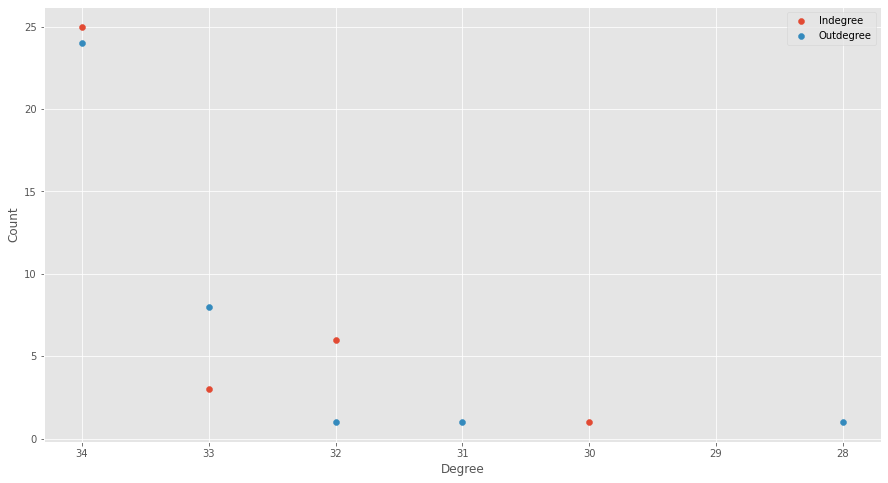

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(list(indegreedist2011.keys()),  list(indegreedist2011.values()), marker='o')
plt.scatter(list(outdegreedist2011.keys()), list(outdegreedist2011.values()), marker='o')
plt.gca().invert_xaxis()
plt.xlabel('Degree')
plt.ylabel('Count')
plt.legend(['Indegree', 'Outdegree'])
plt.plot()

In [31]:
clustdatastateraw2011         =  list(dfstatewise['clustering'])
uniquedfclustdatastateraw2011 =  dfstatewise['clustering'].unique()
binnedcclust = Counter(uniquedfclustdatastateraw2011)
binnedcclust

Counter({0.983066: 1,
         0.983957: 1,
         0.984848: 1,
         0.98574: 1,
         0.9866309999999999: 1,
         0.9905299999999999: 1})

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.log10(list(dfstatewise['Pop Size'])).reshape(-1,1), np.log10(list(dfstatewise['weighted indegree'])).reshape(-1,1))
print(lr.intercept_[0])

print(lr.coef_[0][0])


3.9254512545175304
0.259067994844409


[]

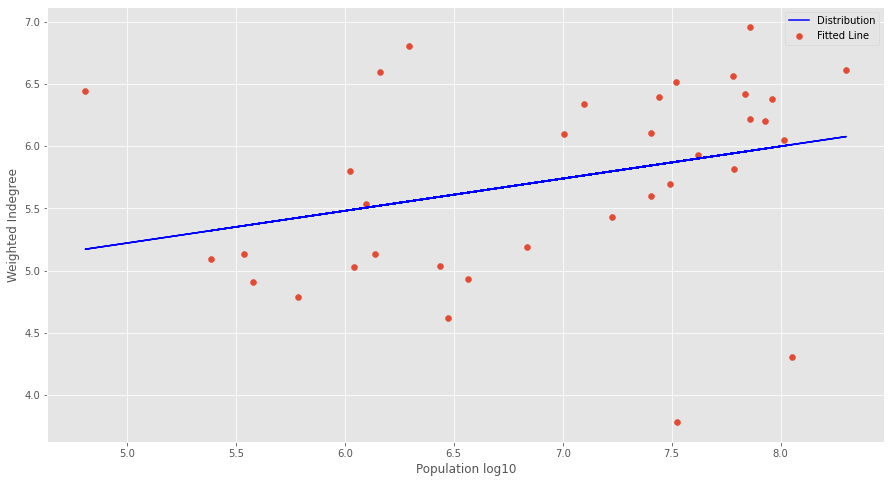

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(np.log10(dfstatewise['Pop Size']), np.log10(dfstatewise['weighted indegree']), marker='o')
plt.plot(np.log10(dfstatewise['Pop Size']),lr.coef_[0][0] * np.log10(dfstatewise['Pop Size']) + lr.intercept_[0],"b-")
# plt.xticks(rotation=90)
# plt.gca().invert_xaxis()
plt.xlabel('Population log10')
plt.ylabel('Weighted Indegree')
plt.legend(['Distribution', 'Fitted Line'])
plt.plot()

[]

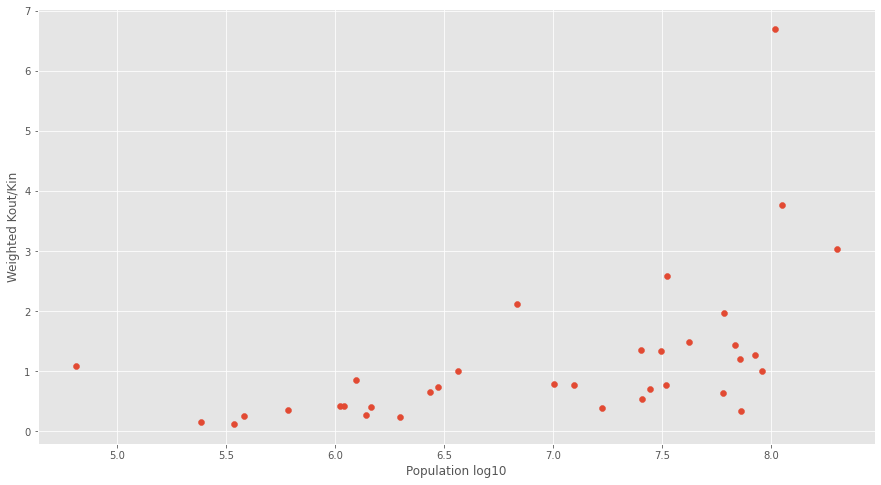

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(np.log10(dfstatewise['Pop Size']), np.divide(dfstatewise['weighted outdegree'], dfstatewise['weighted indegree']), marker='o')
# plt.xticks(rotation=90)
plt.xlabel('Population log10')
plt.ylabel('Weighted Kout/Kin')
plt.plot()

In [35]:
modularitystate = {
    0: list(dfstatewise[dfstatewise.modularity_class == 0].Id),
    1: list(dfstatewise[dfstatewise.modularity_class == 1].Id),
    2: list(dfstatewise[dfstatewise.modularity_class == 2].Id)
}
modularitystate

{0: ['bihar',
  'chandigarh',
  'haryana',
  'himachal pradesh',
  'jammu & kashmir',
  'madhya pradesh',
  'nct of delhi',
  'punjab',
  'rajasthan',
  'uttar pradesh',
  'uttarakhand'],
 1: ['arunachal pradesh',
  'assam',
  'chhattisgarh',
  'jharkhand',
  'manipur',
  'meghalaya',
  'mizoram',
  'nagaland',
  'odisha',
  'sikkim',
  'tripura',
  'west bengal'],
 2: ['andaman & nicobar islands',
  'andhra pradesh',
  'dadra & nagar haveli',
  'daman & diu',
  'goa',
  'gujarat',
  'karnataka',
  'kerala',
  'lakshadweep',
  'maharashtra',
  'puducherry',
  'tamil nadu']}

In [0]:
dfcensus2011['State'] = dfcensus2011['State'].replace('Delhi', 'Nct of Delhi')

In [0]:
dfcensus2011 = dfcensus2011.sort_values(by=['State'])
dfstatewise = dfstatewise.sort_values(by=['Id'])

In [0]:
# for i in range(34):a
#   print(dfcensus2011['State'].tolist()[i],'\t\t\t\t\t\t',dfstatewise.Id.tolist()[i])

In [39]:
dfstatewise.head()

,Id,Label,timeset,modularity_class,Authority,Hub,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighted indegree,weighted outdegree,Weighted Degree,indegree,outdegree,Degree,pageranks,clustering,eigencentrality,Pop Size
0,andaman & nicobar islands,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,81267,20700,101967,34,34,68,0.028992,0.983066,1.00000,380581.0
1,andhra pradesh,NaN,NaN,2,0.171440,0.171473,1,1.0,1.0,0.641716,1591890,2030004,3621894,34,34,68,0.028992,0.983066,1.00000,84580777.0
2,arunachal pradesh,NaN,NaN,1,0.167185,0.171600,1,1.0,1.0,0.422139,136010,37368,173378,33,34,67,0.028180,0.983957,0.97261,1383727.0
3,assam,NaN,NaN,1,0.171440,0.171473,1,1.0,1.0,0.641716,495699,659694,1155393,34,34,68,0.028992,0.983066,1.00000,31205576.0
4,bihar,NaN,NaN,0,0.171440,0.171473,1,1.0,1.0,0.641716,1111954,7453803,8565757,34,34,68,0.028992,0.983066,1.00000,104099452.0


In [40]:
dfcensus2011.head()

,State,Capitals,Type,Population,perctotalpopulation,Males,Females,SexRatio,Literacyrate,Rural Population,Urban Population,Area,Density,DecadalGrowth,Language
0,Andaman and Nicobar Islands,Port Blair,UT,380581,0.03,"202,871","177,710",876,86.63,"244,411","135,533","8,249",46,6.7%,Other
1,Andhra Pradesh,Hyderabad,State,84580777,6.99,"42,442,146","42,138,631",993,67.02,"56,361,702","28,219,075","275,045",308,10.98%,Other
2,Arunachal Pradesh,Itanagar,State,1383727,0.11,"713,912","669,815",938,65.38,"1,069,165","313,446","83,743",17,25.9%,Other
3,Assam,Dispur,State,31205576,2.58,"15,939,443","15,266,133",958,72.19,"26,780,526","4,388,756","78,438",397,16.9%,Assames
4,Bihar,Patna,State,104099452,8.60,"54,278,157","49,821,295",918,61.80,"92,075,028","11,729,609","94,163","1,102",25.1%,Bhojpuri


In [43]:
for i in range(34):
  print(dfcensus2011['State'].tolist()[i],'\t\t\t\t\t\t',dfstatewise.Id.tolist()[i])

Andaman and Nicobar Islands 						 andaman & nicobar islands
Andhra Pradesh 						 andhra pradesh
Arunachal Pradesh 						 arunachal pradesh
Assam 						 assam
Bihar 						 bihar
Chandigarh 						 chandigarh
Chhattisgarh 						 chhattisgarh
Dadra and Nagar Haveli 						 dadra & nagar haveli
Daman and Diu 						 daman & diu
Goa 						 goa
Gujarat 						 gujarat
Haryana 						 haryana
Himachal Pradesh 						 himachal pradesh
Jammu and Kashmir 						 jammu & kashmir
Jharkhand 						 jharkhand
Karnataka 						 karnataka
Kerala 						 kerala
Lakshadweep 						 lakshadweep
Madhya Pradesh 						 madhya pradesh
Maharashtra 						 maharashtra
Manipur 						 manipur
Meghalaya 						 meghalaya
Mizoram 						 mizoram
Nagaland 						 nagaland
Nct of Delhi 						 nct of delhi
Odisha 						 odisha
Puducherry 						 puducherry
Punjab 						 punjab
Rajasthan 						 rajasthan
Sikkim 						 sikkim
Tamil Nadu 						 tamil nadu
Tripura 						 tripura
Uttar Pradesh 						 uttar pradesh
Uttarakhand 						 ut

In [0]:
dfcensus2011.to_csv('/content/drive/My Drive/College/Semester2/MLN/Project Excels/FinalData/census.csv', index=False)

In [0]:
dfstatewise.columns

Index(['Id', 'Label', 'timeset', 'modularity_class', 'Authority', 'Hub',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'weighted indegree', 'weighted outdegree',
       'Weighted Degree', 'indegree', 'outdegree', 'Degree', 'pageranks',
       'clustering', 'eigencentrality', 'Pop Size'],
      dtype='object')

### Link prediction 

In [0]:
G = nx.DiGraph()

In [0]:
lp2011=[]
for i,j,k in zip(temporarydf['Source'].tolist(), temporarydf['Target'].tolist(),temporarydf['Weight'].tolist()):
  if i!=j:
    lp2011.append((i,j,k))

In [0]:
G.add_weighted_edges_from(lp2011)

In [0]:
E = lp2011

In [0]:
G1 = nx.DiGraph()
G1.add_weighted_edges_from(E[:int(len(E)*.75)])

In [0]:
def nonconnectednodes(G):
    n = G.nodes()
    un = set()
    for i in n:
        for j in n:
            x = (i,j)
            if i!=j and not G.has_edge(*x) and x not in un:
                un.add(x)
    return list(un)

In [0]:
un = nonconnectednodes(G1)

In [0]:
def commonNeighbours(un, G):
    un_cn = {}
    for i in un:
        un_cn[i] = list(set(G[i[0]]).intersection(set(G[i[1]])))
    return un_cn

In [0]:
def jaccardIndex(un, G, un_cn=None):
    un_jc = {}
    if un_cn == None:
        un_cn = commonNeighbours(un, G)
    for i in un:
        deno = (G.degree(i[0]) + G.degree(i[1]) - len(un_cn[i]))
        if deno == 0:
            un_jc[i] = 0
        else:
            un_jc[i] = len(un_cn[i])/deno
    return un_jc

In [0]:
def adamicAdarIndex(un, G, un_cn=None):
    if un_cn == None:
        un_cn = commonNeighbours(un, G)
    un_aa = {}
    for i in un_cn:
        un_aa[i] = np.sum([(1/(np.log10(G.degree(j)))) if G.degree(j)>0 else 0 for j in un_cn[i]])
    return un_aa

In [0]:
def preferentialAttachment(un, G):
    un_pa = {}
    for i in un:
        un_pa[i] = G.degree(i[0]) * G.degree(i[1])
    return un_pa

In [0]:
def getTrueLabels(un, G):
    y_true= []
    for i in un:
        if G.has_edge(*i):
            y_true.append(1)
        else:
            y_true.append(0)
    return y_true

In [0]:
un = nonconnectednodes(G1)
un_cn = commonNeighbours(un, G1)
un_jc = jaccardIndex(un, G1, un_cn)
un_aa = adamicAdarIndex(un, G1, un_cn)
un_pa = preferentialAttachment(un, G1)
y_true = getTrueLabels(un, G)

In [0]:
def wecn(un, G):
  w_un_cn = {}
  for i in un:
      k = list(set(G[i[0]]).intersection(set(G[i[1]])))
      w_un_cn[i] = np.sum([G[i[0]][j]['weight'] for j in k] + [G[j][i[1]]['weight'] for j in k])
  return w_un_cn

In [0]:
# w_un_cn = wecn(un, G)

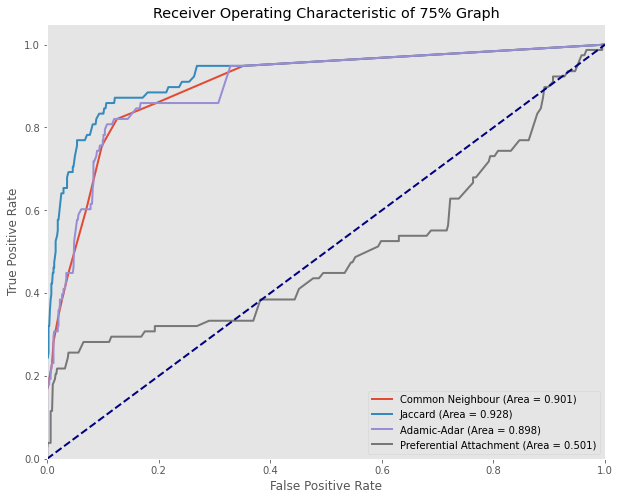

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_true, list(un_jc.values()))
plt.figure(figsize=(10, 8))
lw=2
fpr, tpr, thresholds = roc_curve(y_true, list([len(i) for i in un_cn.values()]))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,lw=lw, label=f'Common Neighbour (Area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(y_true, list(un_jc.values()))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,lw=lw, label=f'Jaccard (Area = %0.3f)' % roc_auc)  
# (area = %0.2f)')roc_auc[2])
fpr, tpr, thresholds = roc_curve(y_true, list(un_aa.values()))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,lw=lw, label=f'Adamic-Adar (Area = %0.3f)' % roc_auc)

fpr, tpr, thresholds = roc_curve(y_true, list(un_pa.values()))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,lw=lw, label=f'Preferential Attachment (Area = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of 75% Graph')
plt.legend(loc="lower right")
plt.show()

In [0]:
from networkx.algorithms import community
from networkx import edge_betweenness_centrality as betweenness
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['andaman & nicobar islands',
  'andhra pradesh',
  'arunachal pradesh',
  'assam',
  'bihar',
  'chhattisgarh',
  'dadra & nagar haveli',
  'daman & diu',
  'goa',
  'gujarat',
  'jharkhand',
  'karnataka',
  'kerala',
  'lakshadweep',
  'madhya pradesh',
  'maharashtra',
  'manipur',
  'meghalaya',
  'mizoram',
  'nagaland',
  'nct of delhi',
  'odisha',
  'puducherry',
  'punjab',
  'rajasthan',
  'sikkim',
  'tamil nadu',
  'tripura',
  'uttar pradesh',
  'west bengal'],
 ['chandigarh', 'haryana', 'himachal pradesh', 'uttarakhand'],
 ['jammu & kashmir']]

In [0]:
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(comp))

(['andaman & nicobar islands',
  'andhra pradesh',
  'arunachal pradesh',
  'assam',
  'bihar',
  'chandigarh',
  'chhattisgarh',
  'dadra & nagar haveli',
  'daman & diu',
  'goa',
  'gujarat',
  'haryana',
  'himachal pradesh',
  'jammu & kashmir',
  'jharkhand',
  'kerala',
  'madhya pradesh',
  'maharashtra',
  'manipur',
  'meghalaya',
  'mizoram',
  'nagaland',
  'nct of delhi',
  'odisha',
  'punjab',
  'rajasthan',
  'sikkim',
  'tamil nadu',
  'tripura',
  'uttar pradesh',
  'uttarakhand',
  'west bengal'],
 ['karnataka', 'lakshadweep', 'puducherry'])

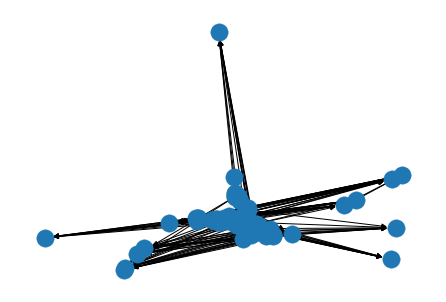

In [0]:
nx.draw(G, pos=nx.draw_spring(G))

### View

In [0]:
import folium
!pip install pycountry_convert 
import pycountry_convert
!pip install calmap
import calmap

     |████████████████████████████████| 10.0MB 6.9MB/s 
     |████████████████████████████████| 235kB 43.6MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=afa123cbdd1ed9809e2138e048e96edcb8315afbed680f73eef214ddd6e54003
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=5,height=800,width="100%")

In [0]:
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "NCT of Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india = pd.DataFrame(index = list(locations.keys()))
df_india["Lat"] = ""
df_india["Long"] = ""
colorstate = []
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]
    if index in dfstatewise['Id']:
      colorstate.append('')


In [0]:
dfstatewise['modularity_class']

0     2
1     2
2     1
3     1
4     0
5     0
6     1
7     2
8     2
9     2
10    2
11    0
12    0
13    0
14    1
15    2
16    2
17    2
18    0
19    2
20    1
21    1
22    1
23    1
24    0
25    1
26    2
27    0
28    0
29    1
30    2
31    1
32    0
33    0
34    1
Name: modularity_class, dtype: int64

In [0]:
df_india = df_india.sort_index()
df_india

,Lat,Long
Andaman and Nicobar Islands,11.7401,92.6586
Andhra Pradesh,15.9129,79.74
Arunachal Pradesh,28.218,94.7278
Assam,26.2006,92.9376
Bihar,25.0961,85.3131
Chandigarh,30.7333,76.7794
Chhattisgarh,21.2787,81.8661
Dadra and Nagar Haveli,20.1809,73.0169
Daman and Diu,20.4283,72.8397
Goa,15.2993,74.124


In [0]:
for i in range(0,len(df_india.index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        # "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        # "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        # "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        # "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        # "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['Mortality Rate (per 100)'],2))+"</li>"+
        "</ul>"
        ,
        radius=1000,
      color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

In [0]:
india

## Community Detection

Link: https://hal.archives-ouvertes.fr/hal-01231784/document

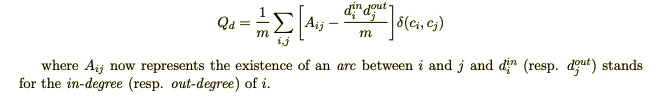

In [0]:
G.get_edge_data('assam', 'goa')

## Modularity

In [0]:
{i:'sum'  for i in list(dfstateraw2011.columns[2:23])}

{'Business Females': 'sum',
 'Business Males': 'sum',
 'Business Persons': 'sum',
 'Education Females': 'sum',
 'Education Males': 'sum',
 'Education Persons': 'sum',
 'Marriage Females': 'sum',
 'Marriage Males': 'sum',
 'Marriage Persons': 'sum',
 'Moved after birth Females': 'sum',
 'Moved after birth Males': 'sum',
 'Moved after birth Persons': 'sum',
 'Moved with household Females': 'sum',
 'Moved with household Males': 'sum',
 'Moved with householdPersons': 'sum',
 'Total migrants Males': 'sum',
 'Total migrants Persons': 'sum',
 'Total migrantsFemales': 'sum',
 'Work/employment Females': 'sum',
 'Work/employment Males': 'sum',
 'Work/employment Persons': 'sum'}

In [0]:
dfstateraw2011.head()

,Area Name,Last residence,Total migrants Persons,Total migrants Males,Total migrantsFemales,Work/employment Persons,Work/employment Males,Work/employment Females,Business Persons,Business Males,Business Females,Education Persons,Education Males,Education Females,Marriage Persons,Marriage Males,Marriage Females,Moved after birth Persons,Moved after birth Males,Moved after birth Females,Moved with householdPersons,Moved with household Males,Moved with household Females,Others Persons,Others Males,Others Females,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 16338,Unnamed: 16339,Unnamed: 16340,Unnamed: 16341,Unnamed: 16342,Unnamed: 16343,Unnamed: 16344,Unnamed: 16345,Unnamed: 16346,Unnamed: 16347,Unnamed: 16348,Unnamed: 16349,Unnamed: 16350,Unnamed: 16351,Unnamed: 16352,Unnamed: 16353,Unnamed: 16354,Unnamed: 16355,Unnamed: 16356,Unnamed: 16357,Unnamed: 16358,Unnamed: 16359,Unnamed: 16360,Unnamed: 16361,Unnamed: 16362,Unnamed: 16363,Unnamed: 16364,Unnamed: 16365,Unnamed: 16366,Unnamed: 16367,Unnamed: 16368,Unnamed: 16369,Unnamed: 16370,Unnamed: 16371,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377
0,jammu & kashmir,jammu & kashmir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jammu & kashmir,himachal pradesh,8609,2688,5921,726,643,83,109,74,35,165,95,70,4266,137,4129,72,49,23,1470,601,869,1801,1089,712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,jammu & kashmir,punjab,43938,12318,31620,3804,3237,567,816,708,108,440,219,221,23773,548,23225,618,387,231,7212,3162,4050,7275,4057,3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,jammu & kashmir,chandigarh,611,249,362,88,73,15,7,7,0,17,10,7,153,6,147,26,13,13,183,71,112,137,69,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jammu & kashmir,uttarakhand,3180,1633,1547,447,390,57,37,29,8,60,36,24,361,57,304,42,26,16,1180,393,787,1053,702,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dfstateraw2011.groupby('Area Name').agg({i:'sum'  for i in list(dfstateraw2011.columns[2:23])})

,Total migrants Persons,Total migrants Males,Total migrantsFemales,Work/employment Persons,Work/employment Males,Work/employment Females,Business Persons,Business Males,Business Females,Education Persons,Education Males,Education Females,Marriage Persons,Marriage Males,Marriage Females,Moved after birth Persons,Moved after birth Males,Moved after birth Females,Moved with householdPersons,Moved with household Males,Moved with household Females
Area Name,,,,,,,,,,,,,,,,,,,,,
andaman & nicobar islands,81267,44492,36775,27723,26304,1419,2022,1915,107,681,455,226,17071,340,16731,2010,1097,913,20916,7492,13424
andhra pradesh,1591890,607869,984021,281141,231471,49670,44977,37079,7898,23951,13104,10847,558334,24790,533544,93675,52807,40868,319699,124905,194794
arunachal pradesh,136010,75904,60106,49370,41110,8260,9717,8613,1104,1527,928,599,19281,319,18962,2038,1127,911,34435,12096,22339
assam,495699,238339,257360,81563,74921,6642,52075,49697,2378,4908,3074,1834,161679,5495,156184,8966,5407,3559,105297,49729,55568
bihar,1111954,164328,947626,57155,45028,12127,5330,2959,2371,5363,3258,2105,814648,15275,799373,12797,7537,5260,78884,33542,45342
chandigarh,633966,337061,296905,200291,185856,14435,8250,7463,787,22494,13769,8725,108064,1290,106774,35333,20675,14658,190384,67942,122442
chhattisgarh,1267668,538624,729044,298921,269311,29610,13056,11213,1843,10356,7196,3160,413383,11436,401947,51887,30622,21265,366817,143643,223174
dadra & nagar haveli,135602,81824,53778,57043,54455,2588,3467,3247,220,632,451,181,20907,957,19950,3389,1831,1558,39400,14160,25240
daman & diu,124522,86009,38513,70048,67115,2933,1812,1653,159,526,306,220,12644,335,12309,4783,2734,2049,27690,9611,18079
